# Algoritmische technieken: Zoeken en Sorteren
------------------

"Het zoekprobleem" bestaat uit het vinden een
gegeven data element in een grote hoop data. De toepassingen
hiervan zijn haast niet te tellen. Denk maar aan een
woordenboekapp waarin je verklaringen of vertalingen van een gegeven woord
kan opzoeken, aan
het elektronische telefoonboek dat in je GSM zit, aan Google die je snel
de sites voor gevraagde sleutelwoorden kan leveren, enz. Omwille van de
gigantische hoeveelheid toepassingen van "het zoekprobleem" is het 
mogelijk om hierover boeken vol te schrijven. In dit hoofdstuk
beperken we ons tot de basis: we bestuderen de bekendste algoritmen om
een element in een lijst te zoeken.

"Het sorteerprobleem" is al even alomtegenwoordig. Denk opnieuw aan het
telefoonboek in je GSM dat alfabetisch gesorteerd is. Een ander
voorbeeld is de "sort" menukeuze in het beroemde Excel rekenblad,
waarmee je het rekenblad kan sorteren op een bepaalde kolom of rij. Ten
slotte vermelden we nog "de flapjes" in iTunes waarmee je je playlists
kan sorteren op titel, artiest, enz. Dit zijn allen voorbeelden van
lijsten met gegevens erin die door de computer herschikt dienen te
worden zodat de gegevens uiteindelijk in gesorteerde volgorde komen te
staan.

## De complexiteit van een algoritme
-----------------De complexiteit van een algoritme geeft aan hoe efficiënt een functie is in tijd en ruimte. Meestal wordt gebruik gemaakt van een asymptotische notatie, de <b>Big-O</b> notatie, die het worst-case scenario beschrijft. 
### Tijdcomplexiteit
Wanneer je het hebt over tijdcomplexiteit gaat het over het aantal vergelijkingsopdrachten en het doorlopen van de lussen in jouw implementatie, en hoe dat aantal toeneemt bij een toenemend aantal elementen in de invoer. Waneer bijvoorbeeld een lus twee keer volledig wordt doorlopen zoals in het codestukje hieronder spreek je over een complexiteit $O(n^2)$.was. 

In [1]:
def een_functie(n):
    iteraties = 0
    for i in range(n):
        for j in range(n):
            iteraties = iteraties + 1
            
    print("n² =", n**2)
    print("Aantal iteraties =", iteraties)

een_functie(10)

n² = 100
Aantal iteraties = 100


### Ruimtecomplexiteit
Ruimtecomplexiteit bespreekt, het asymptotische maximum van het geheugengebruik van een functie in vergelijking tot het aantal elementen in de invoer. Wordt er geen extra geheugen toegewezen, spreek je van ruimtecomplexiteit $O(1)$. Dit kan enkel het geval zijn bij iteratieve algoritmen, waardoor deze algoritmen het meest geschikt zijn voor platformen waar geheugengebruik een belangrijk aandachtspunt is zoals embedded systemen.

## Zoeken in Lijsten
-----------------

Het eerste probleem waar we ons in dit hoofdstuk op toespitsen is het
zoeken van de positie van een gegeven element in een gegeven lineaire datastructuur. 
Dit is wat achter de schermen gebeurt als je bijvoorbeeld
een naam opzoekt in het telefoonboek van je GSM of als je een woord
opzoekt in een elektronisch woordenboek. Concreet gaan we zoeken naar de index van 
een gegeven element in een Python lijst van lengte $n$. Maar een groot stuk van de 
bespreking en analyse geldt in het algemeen voor zoeken in een lineaire structuur.
Bedoeling is dus om een Python
functie `find(lst,elm)` te schrijven die het elementje `elm` opzoekt in
de lijst `lst`. Op zich klinkt dit wat raar: waarom een element zoeken
in een lijst als je dat element al hebt? Soms is het op zich belangrijk om te 
kunnen controleren of een gegeven element in een lange lijst voorkomt, bv heb ik 
een telefoonnummer voor *Jan*. Een andere nuance is dat
`find` de *index* van dat element gaat teruggeven. Je vindt dan in je 
telefoonbook naast de naam die je opzocht het telefoonnummer dat je zocht. 
Er moet ook een manier zijn om aan te geven dat het gezochte element niet
in de lijst voorkomt. Onderstaande implementaties geven dan de lengte van de lijst 
terug.  Herinner dat de grootst mogelijk index `len(lst)-1` is, dus als je een te 
grote index terugkrijgt weet je dat het element niet gevonden werd. Soms geven 
zoekalgoritmes bv. `-1` of `False` terug om aan te geven dat het element niet 
gevonden werd. Op de plaats in je code waar je de `find` aanroept zal je dan moet 
controleren wat de  terugkeerwaarde is en daarrond dan de juist beslissing nemen.

### Lineair Zoeken

Het eerste algoritme waarmee we `find` kunnen realiseren heet *lineair
zoeken*. Het is de meest naïeve oplossing van het probleem: we lopen
m.b.v. een `while` lus gewoon de hele lijst van voor naar achter af op
zoek naar het element. 

De procedure initialiseert een tellertje `idx` op 0 en verhoogt dat (zie
`idx = idx+1`) in elke slag van de iteratie. In de test van de `while`
moeten we twee condities aftoetsen. Ten eerste dienen we ervoor te
zorgen dat er gestopt wordt indien de hele lijst (onsuccesvol) werd
doorlopen. Dit doen we door onze teller te vergelijken met de lengte van
de lijst. Ten tweede dienen we na te kijken of we het gewenste elementje
misschien gevonden hebben. In dat laatste geval wordt het zoekproces
gestopt. De laatste lijn `return idx` geeft hetzij de correcte index
weer, hetzij de lengte van de lijst om aan te geven dat het zoeken niet
succesvol was. 

In [2]:
def find(lst, elm):
    idx = 0
    while idx < len(lst) and lst[idx] != elm:
        idx = idx+1
    return idx

In [3]:
test = ["jan","ann","els","jef","mia"]

In [4]:
find(test, "els")

2

In [5]:
find(test, "theo")

5

We hebben in een aparte module `Tracing` een heleboel functies klaargezet die toelaten om de werking van de algoritmen in dit hoofdstuk op te volgen. We leggen deze niet uit omdat het gewoon een heleboel prutswerk is om in verschillende kleuren en geaccentueerd af te printen.

Voor de `find` wordt het element waarnaar gezocht wordt eerst in het geel afgeprint. Dan wordt voor elke slag van de iteratie de hele lijst waarin gezocht wordt uitgeprint. Daarbij worden verschillende kleuren gebruikt. Het element dat in deze iteratieslag vergeleken wordt, i.e. het element op positie `idx` wordt in het geel geaccentueerd. Alle elementen die in een vorige iteratieslag al werden bekeken staan geel gekleurd. Alle elementen die nog niet werden bekeken zijn blauw gekleurd. Tenslotte wordt de gevonden positie met een groen pijltje aangeduid of, indien het element niet in de lijst voorkomt wordt een rood kruis getoond.

De eerste trace toont hoe `3` wordt gevonden in de voorbeeldlijst `[4,2,7,5,1,8,2,5,3,4,2,5]` op de achtste positie. Er zijn daarvoor $9$ vergelijkingen gebeurd. De tweede trace toont dat er minder stappen nodig zijn als het gezochte element meer vooraan in de lijst staat. Het getal `2` wordt al gevonden  na slechts 2 elementen bekeken te hebben. Het derde experimentje toont dat alle elementen van de lijst moeten afgelopen worden voor je kan concluderen dat een element niet aanwezig is.

In [6]:
from Tracing import *

In [7]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,3)

3 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
                ^



8

In [8]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,2)

2 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
  ^



1

In [9]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,6)

6 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
                        X



12

Wat is de snelheid van lineair zoeken? Het is duidelijk dat we in het
beste geval het gezochte element meteen hebben gevonden, nml. in het geval het 
gezochte element helemaal vooraan in de lijst staat. De best-case is
dus in $O(1)$. In het slechtste geval dienen we de hele lijst af te
lopen en vinden we het elementje zelfs niet eens terug. De worst-case is
dus in $O(n)$. Om te weten dat een element niet in een lijst zit zijn dus altijd $n$ vergelijkingen nodig. 
Om een element terug te vinden is een aantal stappen nodig ergens tussen 1 en n. Hoeveel juist hangt af van andere factoren zoals de verdeling van de waarden die in de lijst zitten.

### Binair Zoeken

Een radicaal andere manier om hetzelfde probleem op te lossen wordt
*binary search* genoemd. 

Binary search gaat ervan uit dat de elementen van de lijst gesorteerd
zijn. Dit is een zeer belangrijke voorwaarde. Binary search werkt niet
voor lijsten wiens elementen niet gesorteerd zijn.

Binary search doet denken aan de manier waarop we een naam opzoeken in
een telefoonboek. Men neemt het telefoonboek in de hand en opent het
ongeveer in het midden. Afhankelijk van de pagina die we zien (bvb. met
namen die beginnen met een K), beslissen we of de gezochte naam in het
linker dan wel het rechterdeel van het boek moet zitten. Dit is mogelijk
aangezien de gegevens gesorteerd zijn. Eens de keuze gemaakt, wordt dus
de helft van de te doorzoeken data geëlimineerd! De gekozen helft wordt
opnieuw in tweeën gedeeld en dit gaat door tot we op de juiste bladzijde
terecht komen.

De implementatie van dit principe ziet er als volgt uit:

In [10]:
def bin_search(lst, elm):
    left  = 0
    right = len(lst) - 1
    while left <= right:
        mid = (left + right) // 2 #gehele deling om 'middelste' index te berekenen
        if lst[mid] == elm:
            return mid
        if lst[mid] < elm:
            left=mid+1
        else:
            right=mid-1
    return len(lst)

In [11]:
test = ["ann","els","jan", "jef", "mia"]

In [12]:
bin_search(test, "els")

1

In [13]:
bin_search(test, "theo")

5

De functie bin_search neemt een lijst `lst` en het op te zoeken elementje `elm`. Ze geeft de index weer van het element in de lijst of de lengte van de lijst ingeval het element niet in de lijst voorkomt. De twee variabelen left en right evolueren steeds dichter naar elkaar toe. In iedere slag van de iteratie berekenen we de middelste index mid. Indien het gezochte element toevallig gevonden wordt op die index, zijn we klaar en geven we de index mid weer als eindresultaat. Anders vergelijken we het op te zoeken element met het element dat op die index zit en zoeken we op basis van de uitkomst van die vergelijking verder in de linker- of rechterhelft van de huidige opdeling. De herhaling blijft doorgaan zolang de linkerhelft kleiner of gelijk is aan de rechterhelft.

### Performantie

Wat kunnen we zeggen over de uitvoeringssnelheid? Als we geluk hebben, vinden we het gezochte element meteen de allereerste keer. De
best-case is dus opnieuw in $O(1)$. 
Om de worst-case te bepalen, observeren we het algoritme met de twee variabelen `left` en `right` die respectievelijk de waardes `0` en `len(lst)-1` krijgen en stoppen indien er geen verschil meer is tussen deze variabelen. In elke slag wordt ofwel `left` ofwel `right` "vervangen" door `mid+1` of
`mid-1` zodat het verschil tussen `left` en `right` halveert in iedere slag. De vraag is dus hoeveel keer (laat ons zeggen, $k$) we $n=$
`len(lst)` kunnen halveren alvorens we $1$ uitkomen. Dus, voor welke $k$ is $\frac{n}{2^k}=1$? Dat is per definitie $k=log_2(n)$.

We kunnen dus stellen dat binair zoeken in $O(log_2(n))$ is. Merk op dat dit een dramatische(!) verbetering is t.o.v. lineair zoeken. Zelfs om een lijst
van miljoenen elementen te doorzoeken heeft binair zoeken slechts enkele tientallen stappen nodig.

Enkele opmerkingen:

-   Eigenlijk is de basis van de logaritme niet relevant in een $O$
    notatie. Vermits $log_2(x) = \frac{log(x)}{log(2)}$ en vermits
    $\frac{1}{log(2)}$ een constante is (dewelke geen rol spelen bij
    $O$), kunnen we stellen dat $O(log_2(n)) = O(log(n))$.

-   Alhoewel we het reeds vermeld hebben, is het nuttig te herhalen dat
    binair zoeken enkel toepasbaar is op gesorteerde data.
    

### Even verifiëren

De theoretische studie m.b.v. $O$ kan heel makkelijk experimenteel geverifieerd worden. We gaan meten hoe lang het duurt om in lijsten van oplopende lengtes te zoeken.
We gebruiken in de experimenten lijsten met random getallen. We doen hiervoor beroep op de functie `randint` in de module `random`. Deze geeft een willekeurig geheel getal weer dat tussen beide parameters ligt. `randint(1,100)` geeft bijvoorbeeld een willekeurig getal tussen $1$ en $100$. Een lijst genereren van een gevraagde lengte met getallen die random gekozen zijn tussen grenzen 1 en `n//2` kan makkelijk met een *list comprehension* zoals hieronder in de functie `generate_lst` gebeurt. De reden waarom we getallen genereren binnen grenzen die afhangen van de lengte van de lijst is om de kans dat eenzelfde getal meer dan 1 keer voorkomt in alle lengtes van lijsten even groot te maken.

In [14]:
import random

def generate_lst(n):
    return [random.randint(1,n//2) for i in range(0,n)]

Het timen van de uitvoertijd van een functieoproep gebeurt met de `time` module. 

In [15]:
import time

def time_find(lst,e):
    t1 = time.time()
    find(lst,e)
    t2 = time.time() 
    return (t2-t1)*1000

def time_bin_search(lst,e):
    t1 = time.time()
    bin_search(lst,e)
    t2 = time.time() 
    return (t2-t1)*1000

We maken een onderscheid tussen zoeken naar elementen die wel in de lijst voorkomen en  zoeken naar elementen die niet in de lijst voorkomen. Het laatste is makkelijk, we zoeken bv. naar `-1` terwijl we lijsten van positieve getallen gebruiken in onze tests. Voor het andere geval willen we een soort gemiddelde van zoeken naar elementen die eerder vooraan staan in de lijst en element die eerder achteraan staan in de lijst. We kunnen opnieuw de `randint` functie gebruiken om een random positie in de lijst die we onderzoeken te genereren.  Als we dan gaan zoeken naar het element dat in de lijst op die positie staat zijn we dus zeker dat we zoeken naar een element dat voorkomt in de lijst. We gaan het tijdmeten telkens 50 keer herhalen en een gemiddelde gebruiken. We schrijven 4 functies om voor beide algoritmen 2 keer te  timen, 1 keer voor het zoeken naar een element dat er zeker niet inzit, 1 keer voor het zoeken naar een element dat zeker wel in zit. 

In [16]:
def time_find_nok(lst):
    return sum([time_find(lst,-1) for i in range(0,50)])/50
    
def time_find_ok(lst):
    return sum([time_find(lst,lst[random.randint(1,len(lst)-1)]) for i in range(0,50)])/50
    
def time_bin_search_nok(lst):
    return sum([time_bin_search(lst,-1) for i in range(0,50)])/50
    
def time_bin_search_ok(lst):
    return sum([time_bin_search(lst,lst[random.randint(1,len(lst)-1)]) for i in range(0,50)])/50   

We gaan teslotte met behulp van `matplotlib` 4 grafieken tekenen voor tijdsmetingen voor lijsten die variëren in lengte van $m$ tot $10$ keer $m$ met stappen van $m$. Dat kan door voor elke `n` in de `range (m,m*10+1,m)` een testlijst te genereren en daarvoor de tijdsmetingen uit te voeren met de 4 functies die we net schreven. De oproep `plot_all_search_algo(1000)` toont dus de tijdmetingen voor lijsten van lengte 1000 tot 10.000 met stappen van 1000.

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plot_all_search_algo(m):
    x_values = list(range(m,10*m+1,m))
    y_values = [time_find_nok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'g^', label = "Find (False)")
    y_values = [time_find_ok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'ro', label = "Find (True)")
    y_values = [time_bin_search_nok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'bs', label = "Bin_search(False)")
    y_values = [time_bin_search_ok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'yd', label = "Bin_Search(True)")
    plt.ylabel('execution times for search algorithms')
    plt.legend()
    plt.show()        
    return "plot finished"

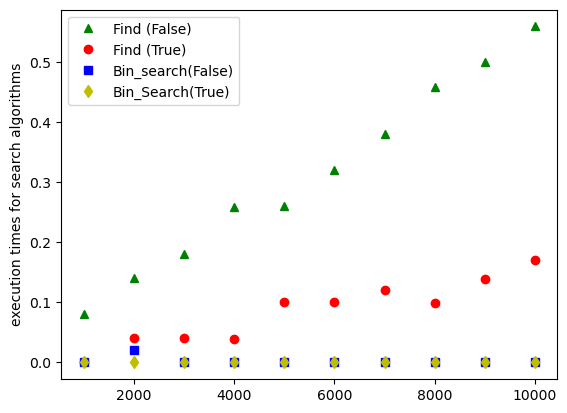

'plot finished'

In [19]:
plot_all_search_algo(1000)

De grafieken bevestigen de theoretische voorspellingen over het tijdsgebruik van de zoekalgoritmen. `find` is $O(n)$, beide grafieken zijn ongeveer rechten. Voor elementen die niet in de lijst zitten is de rechte stijler dan voor elementen die wel worden teruggevonden. Voor `bin-search`, theoretisch $O(log(n))$, zie je inderdaad dat de tijd nodig om een element te zoeken maar heel traag stijgt met de lengte van de lijsten. Je kan de codecel een paar keer uitproberen om pieken die het gevolg zijn van de andere dingen die je computer aan het doen is te vermijden of om met nog langere lijsten te testen. Let wel op, als je `m` heel groot kiest kan het wel een tijdje duren om alle tijdmetingen te doen.

## Sorteren van Lijsten
--------------------

Zoals reeds gezegd in de inleiding is sorteren een veelgebruikte
functionaliteit voor computers. Maar hoe kan een computer een lijst van
$n$ elementen in de juiste volgorde zetten? En hoe lang zal dat dan
duren? In wat volgt onderzoeken we enkele sorteeralgoritmen en
bestuderen we hun snelheid.

Lineair zoeken is de enige oplossing wanneer je werkt met niet gesorteerde gegevens, wil je sneller zoeken in de gegevens dan moet je beschikken over gesorteerde gegevens. Het sorteren op zich gaat steeds gepaard met een complexiteit die in de meest ideale gevallen neerkomt op $O\left(n\cdot \text{log}(n) \right)$. Het is dus niet altijd verstandig om de gegevens te sorteren wanneer je slechts een beperkt aantal keer moet zoeken in de gegevens.  

### Bubbel-sorteren
Een eenvoudig sorteeralgoritme is het bubbelsorteeralgoritme, het dankt zijn naam aan het effect dat de grootste waarden in de gegevenslijst naar boven borrelen zoals de bubbels in een glas frisdrank. Mede dankzij zijn eenvoud is het algoritme echter niet efficiënt en is de tijdscomplexiteit opgegeven als $O(n^2)$.
Het bubbelsorteeralgoritme itereert door de gegevens en vergelijkt $L[n]$ en $L[n+1]$ is de waarde met index $n$ groter dan die met index $n+1$ worden beiden van plaats verwisseld. Vervolgens wordt de iterator n opgehoogt. en herhaalt de cyclus. Na de eerste volledige iteratie staat de allergrootste waarde uit de lijst achteraan in de lijst. Dat deel van de lijst is dan geordend, en wordt tijdens de daarop volgende iteratie niet meer doorlopen.  Onderstaande animatie verduidelijkt de werkwijze.
<p style="text-align:center;"><img src="Sorting_bubblesort_anim.gif"></p>



In [20]:
def bubbel_sort(lst):
    iteraties = 0
    print("Start", iteraties, "iteraties: \t", lst )

    # Laat j waarden aannemen van 1 tot de lengte van de lijst 
    for j in range(1, len(lst)):
        for i in range(len(lst)-j):
            if lst[i] > lst[i+1]:
                lst[i], lst[i+1] = lst[i+1], lst[i]

            iteraties += 1
            print("Na", iteraties, "iteraties: \t", lst )
    return lst

Het bubbel sorteeralgoritme wordt hierboven geïllustreerd met een korte ongesorteerde lijst. <br> Het moet gezegd, dat ondanks de eerder nadelige tijdcomplexiteit van het algoritme, de geheugenimpact van het algoritme met $O(1)$ het beste in zijn soort is. Dit kan je makkelijk inzien omdat er geen nieuwe lijsten worden aangemaakt en alle bewerkingen in de bestaande lijst worden uitgevoerd.

### Insertion Sort

*insertion sort* is een eenvoudig algoritme dat
gelijkt op de manier waarop kaartstpelers hun kaarten in de juiste
volgorde steken. Bij het delen van de kaarten zal degene die deelt de
kaarten willekeurig op tafel leggen (met de rugzijde naar boven
uiteraard, maar dat is hier niet relevant). Iedere kaarspeler zal dan
beginnen met een lege hand en de gedeelde kaarten er met de andere hand
één per één tussensteken in de juiste volgorde. Op ieder moment neemt de
speler dus een volgende kaart --- uit de ongesorteerde hoop --- en steekt hij die
(Eng: to insert) op de juiste plaats in de reeds-gesorteerde hand.

<p style="text-align:center;"><img src="insertionsort.png"></p>
Bovenstaande figuur illustreert de werking van het insertion sort algoritme. De werking is net zoals bij bubble sort gebaseerd op twee geneste lussen maar waar het bubblesort van het begin tot het einde itereert met de grootste overblijvende waarden itereert insertionsort tot er een waarde gevonden wordt die kleiner is dan voorgaande. Dan start een tweede iteratie van de huidige positie in de lijst tot die waarde op zijn correcte locatie staat. 
<br>
<p style="text-align:center;"><img src="insertion_sort.gif"></p>
Indien we dit principe nu toepassen op ongesorteerde lijsten in Python,
krijgen we het volgende algoritme:

In [21]:
def insertion_sort(lst):
    for idx in range(0, len(lst)):
        insert(lst,idx)
        
def insert(lst,idx):
    elm = lst[idx]
    while idx > 0 and lst[idx-1] > elm:
        lst[idx] = lst[idx-1]
        idx      = idx-1
    lst[idx] = elm

In [22]:
test = ["jan", "ann","els","jef", "mia"]

In [23]:
insertion_sort(test)

In [24]:
test

['ann', 'els', 'jan', 'jef', 'mia']

`insertion_sort` wandelt met een `for` ieder element in de lijst af, van links naar rechts. Ze roept voor iedere index `idx` de hulpfunctie `insert` op. Deze zal het idx’ste element van de lijst juist steken in de reeds gesorteerde elementen. Op ieder moment zal onze lijst bestaan uit twee (ongelijke) delen. Het linkerdeel is het reeds gesorteerde deel en het rechterdeel is het nog te sorteren deel. Telkens nemen we dus (met idx) het eerste elementje van het rechterdeel (wat steeds kleiner wordt) en steken we dat op de juiste plaats in het linkerdeel (wat steeds groter wordt). `insert` doet dat door in het linkerdeel van index `idx` te lopen naar 0 toe. Zolang we elementen zien die groter zijn dan het juist te steken element `elm`, schuiven we die 1 plaats naar rechts op. Anders steken we ons elementje op de zopas vrij gekomen plaats en zijn we klaar.
<br><br>
Om te volgen wat gebeurt tracen we hier eerst de werking van `insert` op een voorbeeldlijst waarvan de eerste 6 elementen al gesorteerd staan. De elementen die al ‘goed’ staan zijn groen gekleurd. We illustreren hoe het element op positie 6
 (in het voorbeeld het getal 3) naar de juiste positie verhuist door eerst alle elementen die groter zijn naar rechts op te schuiven. De gele kleur in de trace verduidelijkt welke elementen daarvoor bekeken en eventueel opgeschoven worden. De grijs weergegeven elementen spelen niet mee in deze`insert` stap.

In [25]:
from Tracing import *

In [26]:
test = [1,2,4,6,7,8,3,9,2,8,6,3]
show_insert(test,6)

1 2 4 6 7 8 3 9 2 8 6 3 
1 2 4 6 7 8   9 2 8 6 3 
1 2 4 6 7   8 9 2 8 6 3 
1 2 4 6   7 8 9 2 8 6 3 
1 2 4   6 7 8 9 2 8 6 3 
1 2   4 6 7 8 9 2 8 6 3 
1 2 3 4 6 7 8 9 2 8 6 3 


In de trace van `insertion_sort` zelf zie je dan dat startend van links telkens een extra element wordt 'goed' gezet. Je kan door de gele kleur ook vaststellen dat het aantal elementen dat daarvoor 'bekeken' wordt variabel is in elke iteratie slag maar kleiner dan of gelijk is aan het aantal elementen dat al gesorteerd staat in die iteratie slag.

In [27]:
test = [6,2,4,1,7,8,3,9,2,7,6,3]
show_insertion_sort(test)

6 2 4 1 7 8 3 9 2 7 6 3 
6 2 4 1 7 8 3 9 2 7 6 3 
6 2 4 1 7 8 3 9 2 7 6 3 
2 6 4 1 7 8 3 9 2 7 6 3 
2 4 6 1 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 3 4 6 7 8 9 2 7 6 3 
1 2 3 4 6 7 8 9 2 7 6 3 
1 2 2 3 4 6 7 8 9 7 6 3 
1 2 2 3 4 6 7 7 8 9 6 3 
1 2 2 3 4 6 6 7 7 8 9 3 
1 2 2 3 3 4 6 6 7 7 8 9 

**Performantie**

Wat is de snelheid van dit algoritme? De eerste keer moeten we een
element tussenvoegen in een lijst van lengte $0$. De tweede keer moeten
we een element tussenvoegen in een lijst van lengte $1$. De derde keer
moeten we een element tussenvoegen in een lijst van lengte $2$.
Enzoverder. De laatste keer moeten we een element toevoegen in een lijst
van lengte $n-1$. In het allerslechtste geval is de data omgekeerd
gesorteerd. In dat geval kost een element toevoegen in een lijst van
lengte $i$ ons $O(i)$ computationele stappen. In totaal krijgen we dus
$\displaystyle\sum_{i=1}^{n-1}{i} = \frac{1}{2}n(n-1) = O(n^{2})$
stappen. Insertion sort heeft een interessante best-case. Indien we de
functie oproepen met een lijst die reeds gesorteerd is zal het
tussenvoegen slechts 1 stapje vereisen (vergewis je hiervan met onderstaande trace). In dat
geval is de totale hoeveelheid werk dus slechts $O(n)$. Inderdaad, de
functie `sort` zal met de `for` alle elementen beschouwen en ze
tussenvoegen (in 1 stap).

In [28]:
test = [1,2,3,4,5,6,7,8,9]
show_insertion_sort(test)

1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 

### Quicksort

Zowel `insertion_sort` als `bubbel_sort` algoritmen vertonen dus een $O(n^2)$ gedrag. 
Men zou kunnen denken dat dit het lot des levens is indien we een computer
willen laten sorteren, maar dit is gelukkig niet het geval. We gaan nu
over tot de bespreking van een algoritme dat veel sneller is. Het werd
in de jaren $60$ uitgevonden door C.A.R. Hoare en staat bekend onder de
naam *quicksort*. We zullen aantonen dat quicksort een performantie
heeft die in $O(n.log(n))$ zit. Quicksort is niet het enige
sorteeralgoritme dat in $O(n.log(n))$ zit maar wel het meest beroemde.
<p style="text-align:center;"><img src="quick_sort_hoare.gif"></p>
We zullen het quicksort algoritme uitleggen in zijn simpelste (nogal inefficiënte) versie. Zodat het begrijpen van het principe centraal staat. 

In [29]:
def simple_quicksort(lst):
    if len(lst)<=1:
        return lst
    else:
        pivot = lst[0]  # Kies het eerste element als de pivot
        lesser = []     # Lijst voor elementen kleiner dan de pivot
        greater = []    # Lijst voor elementen groter dan of gelijk aan de pivot
    
        for x in lst[1:]:
            if x < pivot:
                lesser.append(x)
            else:
                greater.append(x)
    
        # Recursief sorteren van de kleinere en grotere lijsten
        return simple_quicksort(lesser) + [pivot] + simple_quicksort(greater)

Quicksort is een recursief (hierover later meer) algoritme dat een lijst opbreekt in
deellijsten. Indien de invoerlijst leeg is of maar uit 1 element bestaat, is het sorteren triviaal en
is het resultaat dezelfde lijst. Anders beschouwen
we het element op de eerste plaats (t.t.z. `lst[0]`). We zullen dit
element de *pivot* noemen. Dan lopen we door de lijst `lst` en plukken
we er alle elementen uit die strikt kleiner zijn dan het pivot element
en plukken we er alle elementen uit die groter zijn dan het pivot
element. Dit resulteert in twee nieuwe lijsten die we allebei recursief
sorteren. Het eindresultaat bestaat dan uit de gesorteerde lijst van
elementen die kleiner zijn dan de pivot, gevolgd door de pivot, gevolgd
door de gesorteerde lijst van elementen die groter zijn dan de pivot.

Bovenstaande code is nogal inefficiënt onder andere omdat tijdens de recursie er in iedere recursieve oproep twee *nieuwe* lijsten gemaakt worden. Dit gebeurt door de twee list comprehensions in de code. Alle elementen worden door Python uit `lst` gekopieerd naar de nieuwe lijsten `lesser` en `greater`. 
    
Een gevolg van dit laatste is dat wanneer we deze versie van het algoritme testen door een lijstje te maken en de `simple_quicksort`  functie erop los te laten er een nieuwe lijst wordt teruggegeven die inderdaad dezelfde elementen als de originele lijst bevat in de juiste volgorde. Maar de originele lijst is niet veranderd.

In [30]:
test = ["jan", "ann","ils","jef", "mia"]

In [31]:
simple_quicksort(test)

['ann', 'ils', 'jan', 'jef', 'mia']

In [32]:
test

['jan', 'ann', 'ils', 'jef', 'mia']

**Performantie**

Om de snelheid van quicksort te bepalen zullen we het totaal aantal
stappen tellen dat het algoritme dient uit te voeren. Al wat we dienen
te doen is de som te nemen van het totaal aantal stappen die ooit door
het algoritme zullen uitgevoerd worden. 

*Best-case Analyse:*

In het beste geval hebben we steeds zeer veel geluk en zal de pivot
    zodanig zijn dat er precies evenveel elementen kleiner dan de pivot
    zijn, als er elementen zijn die groter dan de pivot zijn. In dat
    geval wordt de lijst tussen `l` en `r` op ieder recursieniveau
    perfect in tweeën verdeeld. In beide recursieve oproepen tesamen
    zullen er opnieuw twee pivot's worden goedgestoken. Bijgevolg is de Big O in het beste geval $O(n.log(n))$

*Worst-case Analyse:*

Maar we kunnen echter ook heel veel tegenslag hebben. Stel dat we
    quicksort toepassen op een lijst die reeds gesorteerd is. In dat geval zal de pivot steeds het
    kleinste element zijn van alle elementen tussen `l` en `r`. Er
    zullen dus *geen* elementen links van de pivot komen en alle
    elementen zullen rechts van de pivot komen te staan. In ieder niveau
    van de recursie wordt er dus slechts $1$ stapje minder werk gedaan
    dan in het vorige niveau. De linkse
    recursieve oproep zal dus geen werk verrichten en meteen terugkeren.
    De rechtse recursieve oproep moet al het werk doen, behalve het ene
    stapje van het vorige niveau. Dit geeft $O(n^{2})$
    
Onderstaande trace illustreert dit. 

In [33]:
test = [1,2,3,4,5,6,7,8,9]
show_simple_quicksort(test)

1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
  2 3 4 5 6 7 8 9 
  2 3 4 5 6 7 8 9 
    3 4 5 6 7 8 9 
    3 4 5 6 7 8 9 
      4 5 6 7 8 9 
      4 5 6 7 8 9 
        5 6 7 8 9 
        5 6 7 8 9 
          6 7 8 9 
          6 7 8 9 
            7 8 9 
            7 8 9 
              8 9 
              8 9 
                9 
              8 9 
            7 8 9 
          6 7 8 9 
        5 6 7 8 9 
      4 5 6 7 8 9 
    3 4 5 6 7 8 9 
  2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 


Een gelijkaardig scenario doet zich voor bij een invoerlijst die *omgekeerd* gesorteerd is. Er
    zullen nu *geen* elementen rechts van de pivot komen en alle
    elementen zullen links van de pivot komen te staan. In ieder niveau
    van de recursie wordt er dus slechts $1$ stapje minder werk gedaan
    dan in het vorige niveau. De rechtse
    recursieve oproep zal dus geen werk verrichten en meteen terugkeren.
    De linkse recursieve oproep moet al het werk doen, behalve het ene
    stapje van het vorige niveau. We krijgen dus in totaal $n$
    recursieve oproepen zoals de trace hieronder illustreert.

In [34]:
test = [9,8,7,6,5,4,3,2,1]
show_simple_quicksort(test)

9 8 7 6 5 4 3 2 1 
8 7 6 5 4 3 2 1 9 
8 7 6 5 4 3 2 1 
7 6 5 4 3 2 1 8 
7 6 5 4 3 2 1 
6 5 4 3 2 1 7 
6 5 4 3 2 1 
5 4 3 2 1 6 
5 4 3 2 1 
4 3 2 1 5 
4 3 2 1 
3 2 1 4 
3 2 1 
2 1 3 
2 1 
1 2 
1 
1 2 
1 2 3 
1 2 3 4 
1 2 3 4 5 
1 2 3 4 5 6 
1 2 3 4 5 6 7 
1 2 3 4 5 6 7 8 
1 2 3 4 5 6 7 8 9 


### Experimentele Verificatie

Het is leerrijk om de theoretische studie m.b.v. $O$ te vergelijken met de echte data. We gebruiken in de experimenten 
lijsten met random getallen er in. We doen hiervoor beroep op de functie `randint` in de module `random`. Deze geeft een willekeurig getal weer dat tussen beide parameters ligt. `randint(1,100)` geeft bijvoorbeeld een willekeurig getal tussen $1$ en $100$. 

Een lijst genereren van een gevraagde lengte met getallen die random gekozen zijn tussen grenzen 1 en `n//2` kan makkelijk met een *list comprehension* zoals hieronder in de functie `generate_lst` gebeurt. De reden waarom we getallen genereren binnen grenzen die afhangen van de lengte van de lijst is om de kans dat een zelfde getal meer dan 1 keer voorkomt in alle lengtes van lijsten even groot te maken.

In [35]:
import random

def generate_lst(n):
    return [random.randint(1,n//2) for i in range(0,n)]

Het timen van de functieaanroep gebeurt zoals we al eerder deden met de `time` module.

In [36]:
import time

def time_insertion_sort(lst):
    t1 = time.time()
    insertion_sort(lst)
    t2 = time.time() 
    return (t2-t1)

def time_bubbel_sort(lst):
    t1 = time.time()
    bubbel_sort(lst)
    t2 = time.time() 
    return (t2-t1)

def time_simple_quicksort(lst):
    t1 = time.time()
    simple_quicksort(lst)
    t2 = time.time() 
    return (t2-t1)

Met behulp van Matplotlib gaan we nu 3 grafieken uitzetten door de tijdmetingen te doen voor de 3 algoritmen voor random gegenereerde lijsten met lengtes oplopend van $m$ tot $10$ keer $m$ met stappen van $m$. Dat kan door voor alle `n` in de `range(m,m*10+1,m)` een lijst te genereren met lengte `n`, het sorteren van de lijst te timen, en de meetwaarden uit te zetten. Let op, voor grote $m$ kan dit wel eventjes duren.

In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_all_sort_algo(m):
    x_values = list(range(m,m*10+1,m))
    y_values = [time_insertion_sort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'g^', label = "InsSort")
    y_values = [time_bubbel_sort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'ro', label = "BubSort")
    y_values = [time_simple_quicksort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'yd', label = "Quicksort")
    plt.ylabel('execution times for 3 sorting algorithms')
    plt.legend()
    plt.show()        
    return "plot finished"

Het resultaat voor lijsten met lengtes van 1000,2000,..., tot 10.000 wordt getoond in onderstaande figuur. De theoretische voorspellingen worden netjes experimenteel bevestigd. De grafieken voor insertion sort en bubbel sort zijn parabolen. De grafiek voor quicksort is veel platter. Een lijst sorteren met 10.000 elementen met een basis sorteeralgoritme neemt al enige tijd. De tijd die quicksort nodig heeft is significant kleiner. In twee kleine experimenten onder de grafiek zie je dat quicksort een lijst van 1 miljoen elementen kan sorteren binnen de tijd die insertion-sort nodig heeft om tienduizend elementen te sorteren.

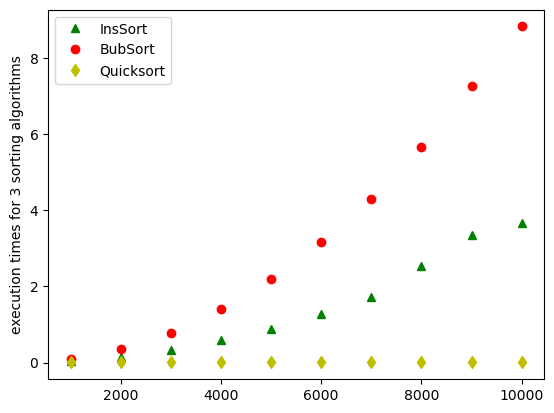

'plot finished'

In [42]:
plot_all_sort_algo(1000)

In [40]:
test = generate_lst(10000)
time_insertion_sort(test)       

1.8669118881225586

In [41]:
test = generate_lst(1000000)
time_simple_quicksort(test)       

1.8753583431243896